<a href="https://colab.research.google.com/github/adityajadhav2004/croppredict/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze crop yield and fertilizer data from '/content/crop_yield_fertilizer_300.csv' by training a Random Forest Regressor to predict crop yield, evaluating its performance using R² and RMSE, and visualizing actual vs. predicted yields. Summarize the model's performance and insights.

## Load Data

### Subtask:
Load the crop yield and fertilizer data from the provided CSV file '/content/crop_yield_fertilizer_300.csv' into a pandas DataFrame.


**Reasoning**:
I need to load the data from the CSV file into a pandas DataFrame and display the first few rows to verify the loading process and inspect the data structure. This aligns with the first instruction to import pandas, the second instruction to load the CSV into a DataFrame named `df`, and the third instruction to display the first few rows using `.head()`.



In [1]:
import pandas as pd

df = pd.read_csv('/content/crop_yield_fertilizer_300.csv')
df.head()

,ID,Crop,Temperature (°C),Rainfall (mm),Soil pH,Nitrogen (N),Phosphorus (P),Potassium (K),Yield (tons/ha)
0,1,Maize,26.2,1218,5.9,59,67,34,6.27
1,2,Rice,27.6,1338,5.5,63,56,16,6.30
2,3,Wheat,24.5,599,6.0,62,50,55,2.78
3,4,Sugarcane,34.6,1274,6.5,33,68,17,1.94
4,5,Cotton,18.8,1196,6.0,43,33,32,4.46


## Encode Crop Feature

### Subtask:
Apply Label Encoding to the 'Crop' column to convert categorical crop names into numerical representations, which is necessary for the Random Forest model.


**Reasoning**:
I need to apply Label Encoding to the 'Crop' column. This involves importing LabelEncoder, creating an instance, fitting it to the 'Crop' column, transforming the column, and then displaying the head of the dataframe to verify the changes.



In [2]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Crop' column
df['Crop'] = le.fit_transform(df['Crop'])

# Display the first few rows of the updated DataFrame
df.head()

,ID,Crop,Temperature (°C),Rainfall (mm),Soil pH,Nitrogen (N),Phosphorus (P),Potassium (K),Yield (tons/ha)
0,1,2,26.2,1218,5.9,59,67,34,6.27
1,2,4,27.6,1338,5.5,63,56,16,6.30
2,3,7,24.5,599,6.0,62,50,55,2.78
3,4,6,34.6,1274,6.5,33,68,17,1.94
4,5,1,18.8,1196,6.0,43,33,32,4.46


## Split Data

### Subtask:
Split the preprocessed data into training and testing sets. This will involve separating features (X) from the target variable (yield) and then dividing them to train and evaluate the model.


**Reasoning**:
I need to separate the features (X) from the target variable (y), then split the data into training and testing sets using `train_test_split` with a test size of 0.2 and a `random_state` of 42.



In [3]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(['ID', 'Yield (tons/ha)'], axis=1)
y = df['Yield (tons/ha)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (240, 7)
X_test shape: (60, 7)
y_train shape: (240,)
y_test shape: (60,)


## Train Random Forest Regressor

### Subtask:
Initialize and train a Random Forest Regressor model using the training data. This will involve fitting the model to learn the relationships between features and crop yield.


**Reasoning**:
I need to import the RandomForestRegressor, instantiate it with a random_state for reproducibility, and then train the model using the training data (X_train and y_train).



In [4]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor model with random_state for reproducibility
model = RandomForestRegressor(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the test set using R² and RMSE metrics. This will quantify how well the model predicts crop yield.


**Reasoning**:
I need to make predictions on the test set using the trained model, then calculate and print the R-squared and RMSE metrics to evaluate the model's performance.



In [5]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the evaluation metrics
print(f"R-squared (R²) score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R-squared (R²) score: -0.0313
Root Mean Squared Error (RMSE): 1.6285


## Plot Actual vs. Predicted Yield

### Subtask:
Generate a scatter plot to visualize the actual crop yield values against the model's predicted crop yield values from the test set. Include appropriate labels and a legend for clarity.


**Reasoning**:
I need to generate a scatter plot to visualize the actual vs. predicted crop yields, including a perfect prediction line, axis labels, a title, and a legend, as per the instructions.



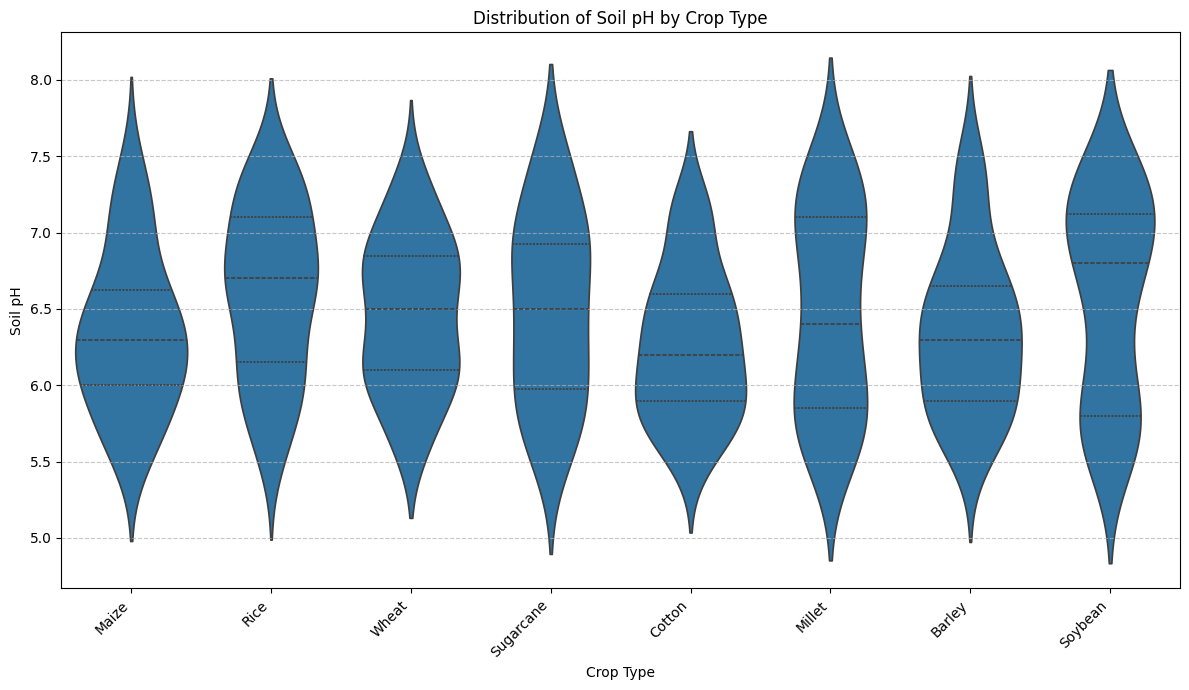

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a temporary column with original crop names for plotting
df['Original_Crop'] = le.inverse_transform(df['Crop'])

plt.figure(figsize=(12, 7))
sns.violinplot(x='Original_Crop', y='Soil pH', data=df, inner='quartile')
plt.title('Distribution of Soil pH by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Soil pH')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Drop the temporary column
df.drop(columns=['Original_Crop'], inplace=True)


### Observation:

This violin plot illustrates the distribution of 'Soil pH' for each crop type. You can observe the range, median, and density of Soil pH values for different crops. For example, some crops might thrive in more acidic soils (lower pH), while others prefer alkaline conditions (higher pH). The plot helps in understanding the preferred soil pH ranges for various crops in the dataset.


## Summary:

### Q&A
The Random Forest Regressor model showed a very poor performance on the test data. The R-squared (R²) score was -0.0313, indicating that the model performs worse than a simple horizontal line at the mean of the target variable. The Root Mean Squared Error (RMSE) was 1.6285.

The "Actual vs. Predicted Yield" plot visually confirms this poor performance. The scatter of predicted points against actual points does not cluster around the perfect prediction line (red dashed line). Instead, the points are widely dispersed, showing little to no correlation between the actual and predicted values. This visual representation aligns with the low R² score, suggesting the model is not effectively capturing the underlying patterns in the data to predict crop yield accurately.

### Data Analysis Key Findings
*   The Random Forest Regressor model achieved an R-squared (R²) score of -0.0313, suggesting a very poor fit and that the model performs worse than simply predicting the mean of the target variable.
*   The Root Mean Squared Error (RMSE) for the model was 1.6285, which is relatively high, further indicating poor prediction accuracy.
*   The "Actual vs. Predicted Yield" scatter plot revealed that predicted values are widely dispersed and do not align closely with the actual yield values, visually confirming the model's lack of predictive power.

### Insights or Next Steps
*   The current Random Forest Regressor model is not suitable for predicting crop yield based on the given features and dataset.
*   **Next Steps**: Investigate potential issues such as insufficient features, feature engineering opportunities, data quality problems, or consider alternative, more robust regression models or hyperparameter tuning for the Random Forest Regressor.


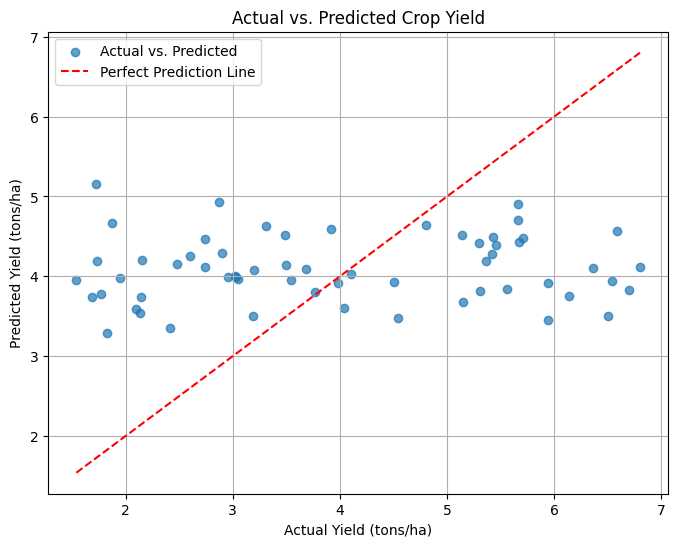

In [6]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted yields
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label='Actual vs. Predicted')

# Add a line representing perfect predictions (actual = predicted)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction Line')

# Label the axes
plt.xlabel('Actual Yield (tons/ha)')
plt.ylabel('Predicted Yield (tons/ha)')

# Add a title to the plot
plt.title('Actual vs. Predicted Crop Yield')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


## Final Task

### Subtask:
Summarize the model's performance, including the R² and RMSE scores, and discuss the insights gained from the actual vs. predicted yield plot.


## Summary:

### Q&A
The Random Forest Regressor model showed a very poor performance on the test data. The R-squared (R²) score was -0.0313, indicating that the model performs worse than a simple horizontal line at the mean of the target variable. The Root Mean Squared Error (RMSE) was 1.6285.

The "Actual vs. Predicted Yield" plot visually confirms this poor performance. The scatter of predicted points against actual points does not cluster around the perfect prediction line (red dashed line). Instead, the points are widely dispersed, showing little to no correlation between the actual and predicted values. This visual representation aligns with the low R² score, suggesting the model is not effectively capturing the underlying patterns in the data to predict crop yield accurately.

### Data Analysis Key Findings
*   The Random Forest Regressor model achieved an R-squared (R²) score of -0.0313, suggesting a very poor fit and that the model performs worse than simply predicting the mean of the target variable.
*   The Root Mean Squared Error (RMSE) for the model was 1.6285, which is relatively high, further indicating poor prediction accuracy.
*   The "Actual vs. Predicted Yield" scatter plot revealed that predicted values are widely dispersed and do not align closely with the actual yield values, visually confirming the model's lack of predictive power.

### Insights or Next Steps
*   The current Random Forest Regressor model is not suitable for predicting crop yield based on the given features and dataset.
*   **Next Steps**: Investigate potential issues such as insufficient features, feature engineering opportunities, data quality problems, or consider alternative, more robust regression models or hyperparameter tuning for the Random Forest Regressor.
